uint8
(768, 768, 3)


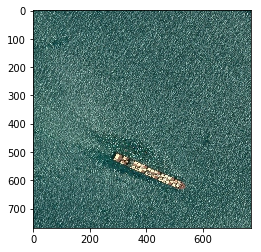

<class 'numpy.ndarray'>


In [33]:
# load and display an image with Matplotlib
import numpy as np
from matplotlib import image
from matplotlib import pyplot

# all of the next images have ships
#listImages = ['00a9e2ec9.jpg', '00a52cd2a.jpg', '00abc623a.jpg', '00ce2c1c0.jpg', '00d0a646b.jpg', '00d412548.jpg', 
#'00e4b52b2.jpg', '00fd8e126.jpg', '0a0df8299.jpg', '0a1a58833.jpg']
# none of the next images has ships
#listImages = ['000aed819.jpg', '000baef0c.jpg', '000c150b0.jpg', '000d42241.jpg', '000db3e62.jpg', '000e37fc6.jpg', '000e64855.jpg', '000f1f959.jpg', '000f7f2fd.jpg', '00a2a6f9e.jpg', '00a2dd872.jpg', '00a4ba88b.jpg']

path_train = '../capstone/data/train_v2/'
# load image as pixel array
image1 = image.imread(path_train + '00ce2c1c0.jpg')

# summarize shape of the pixel array
print(image1.dtype)
print(image1.shape)

# display the array of pixels as an image
pyplot.imshow(image1)
pyplot.show()
#print(np.max(image[:,:,0]))
#print(np.max(image[:,:,1]))
#print(np.max(image[:,:,2]))

# 768 x 768 pixels
# 3 channels for RGB
print(type(image1))

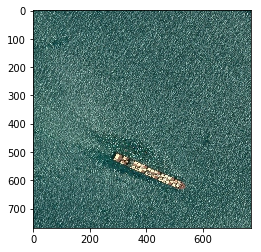

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


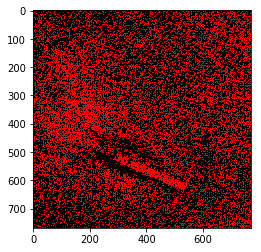

In [34]:
image0 = np.zeros(image1.shape)
limits = [0, 75, 150, 225, 255]

for i in range(768):
    for j in range(768):
        for k in range(1):
            if image1[i,j,k] in range(limits[0],limits[1]):
                image0[i,j,k] = limits[0]
            elif image1[i,j,k] in range(limits[1],limits[2]):
                image0[i,j,k] = limits[1]
            elif image1[i,j,k] in range(limits[2],limits[3]):
                image0[i,j,k] = limits[2]
            elif image1[i,j,k] in range(limits[3],limits[4]):
                image0[i,j,k] = limits[3]

pyplot.imshow(image1)
pyplot.show()
pyplot.imshow(image0)
pyplot.show()

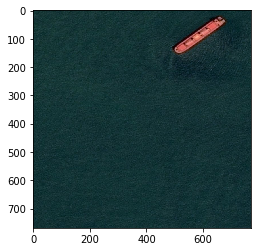

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


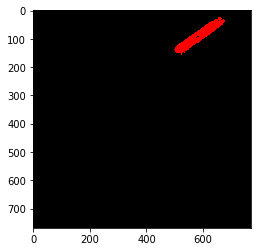

In [41]:
# all of the next images have ships
#listImages = ['00a9e2ec9.jpg', '00a52cd2a.jpg', '00abc623a.jpg', '00ce2c1c0.jpg', '00d0a646b.jpg', '00d412548.jpg', 
#'00e4b52b2.jpg', '00fd8e126.jpg', '0a0df8299.jpg', '0a1a58833.jpg']
# none of the next images has ships
#listImages = ['000aed819.jpg', '000baef0c.jpg', '000c150b0.jpg', '000d42241.jpg', '000db3e62.jpg', '000e37fc6.jpg', '000e64855.jpg', '000f1f959.jpg', '000f7f2fd.jpg', '00a2a6f9e.jpg', '00a2dd872.jpg', '00a4ba88b.jpg']
image2 = image.imread(path_train + '00fd8e126.jpg')
image2 = image.imread(path_train + '00a52cd2a.jpg')
pyplot.imshow(image2)
pyplot.show()

limits = [0, 75, 150, 225, 255]
for i in range(768):
    for j in range(768):
        for k in range(1):
            if image2[i,j,k] in range(limits[0],limits[1]):
                image0[i,j,k] = limits[0]
            elif image2[i,j,k] in range(limits[1],limits[2]):
                image0[i,j,k] = limits[1]
            elif image2[i,j,k] in range(limits[2],limits[3]):
                image0[i,j,k] = limits[2]
            elif image2[i,j,k] in range(limits[3],limits[4]):
                image0[i,j,k] = limits[3]
pyplot.imshow(image0)
pyplot.show()



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


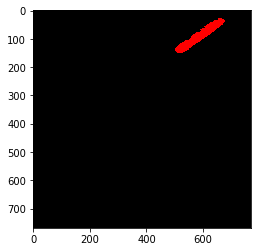

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


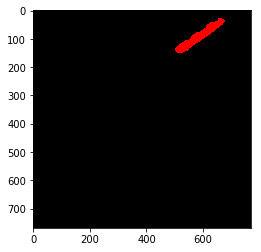

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


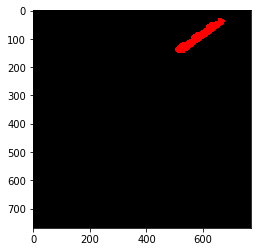

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


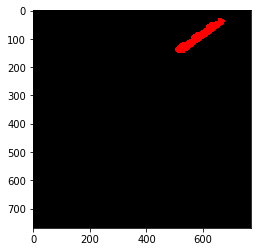

In [42]:
#cleaning outliers

delta = 3

for j in range(4):
    delta = int(delta*(1-j*2/10))
    for i in range(delta,768-delta):
        for j in range(delta,768-delta):
            flag1 = abs(image0[i,j,0]-image0[i-delta,j-delta,0]) > 50
            flag2 = abs(image0[i,j,0]-image0[i-delta,j,0]) > 50
            flag3 = abs(image0[i,j,0]-image0[i-delta,j+delta,0]) > 50
            flag4 = abs(image0[i,j,0]-image0[i,j-delta,0]) > 50
            flag5 = abs(image0[i,j,0]-image0[i,j+delta,0]) > 50
            flag6 = abs(image0[i,j,0]-image0[i+delta,j-delta,0]) > 50
            flag7 = abs(image0[i,j,0]-image0[i+delta,j,0]) > 50
            flag8 = abs(image0[i,j,0]-image0[i+delta,j+delta,0]) > 50

            counter = 0
            if flag1:
                counter += 1
            if flag2:
                counter += 1
            if flag3:
                counter += 1
            if flag4:
                counter += 1
            if flag5:
                counter += 1
            if flag6:
                counter += 1
            if flag7:
                counter += 1
            if flag8:
                counter += 1

            if counter > 4:
                image0[i,j,0] = image0[i,j-1,0]

    pyplot.imshow(image0)
    pyplot.show()


In [36]:
#Vertical ships
slope_val = 0
feature1 = []
feature2 = []
feature1_detected = 0
feature2_detected = 0

for i in range(0,768):
    feature1.append([0,0,0])
    feature2.append([0,0,0])
    feature1_detected = 0
    feature2_detected = 0
    for j in range(1,768):
        if abs(image0[i,j,0] - image0[i,j-1,0]) > 50:
            if feature1_detected == 0:
                feature1_detected = 1
                feature1[i] = [i,j,1]
            elif feature2_detected == 0:
                feature2_detected = 1
                feature2[i] = [i,j,1]



In [37]:
print(len(feature1))
for i in feature1:
    print(i)


768
[0, 4, 1]
[1, 1, 1]
[2, 1, 1]
[3, 495, 1]
[4, 585, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[11, 7, 1]
[12, 6, 1]
[13, 1, 1]
[0, 0, 0]
[15, 767, 1]
[0, 0, 0]
[0, 0, 0]
[18, 767, 1]
[19, 767, 1]
[20, 1, 1]
[21, 766, 1]
[22, 2, 1]
[23, 6, 1]
[24, 7, 1]
[25, 1, 1]
[26, 1, 1]
[27, 1, 1]
[28, 1, 1]
[29, 767, 1]
[30, 1, 1]
[0, 0, 0]
[32, 767, 1]
[0, 0, 0]
[0, 0, 0]
[35, 767, 1]
[36, 767, 1]
[37, 767, 1]
[38, 766, 1]
[39, 2, 1]
[40, 3, 1]
[41, 3, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[45, 739, 1]
[46, 738, 1]
[47, 737, 1]
[48, 736, 1]
[49, 735, 1]
[50, 735, 1]
[51, 735, 1]
[52, 735, 1]
[53, 1, 1]
[54, 5, 1]
[55, 7, 1]
[56, 7, 1]
[57, 8, 1]
[58, 8, 1]
[59, 4, 1]
[60, 3, 1]
[61, 3, 1]
[62, 3, 1]
[63, 1, 1]
[0, 0, 0]
[65, 1, 1]
[66, 1, 1]
[67, 766, 1]
[68, 766, 1]
[69, 766, 1]
[70, 766, 1]
[71, 2, 1]
[72, 1, 1]
[73, 1, 1]
[74, 2, 1]
[0, 0, 0]
[76, 767, 1]
[77, 767, 1]
[78, 6, 1]
[79, 5, 1]
[80, 1, 1]
[81, 767, 1]
[82, 5, 1]
[83, 1, 1]
[84, 4, 1]
[85, 767, 1]
[86, 766, 1]
[87

In [38]:
print(len(feature2))
for i in feature2:
    print(i)


768
[0, 5, 1]
[1, 49, 1]
[2, 494, 1]
[3, 498, 1]
[4, 590, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[13, 5, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[20, 767, 1]
[0, 0, 0]
[22, 767, 1]
[0, 0, 0]
[0, 0, 0]
[25, 8, 1]
[26, 8, 1]
[27, 4, 1]
[28, 767, 1]
[0, 0, 0]
[30, 767, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[39, 766, 1]
[40, 766, 1]
[41, 767, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[45, 742, 1]
[46, 742, 1]
[47, 742, 1]
[48, 742, 1]
[49, 741, 1]
[50, 741, 1]
[51, 741, 1]
[52, 741, 1]
[53, 3, 1]
[54, 767, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[62, 767, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[66, 767, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[72, 3, 1]
[73, 5, 1]
[74, 7, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[80, 5, 1]
[0, 0, 0]
[82, 766, 1]
[83, 5, 1]
[84, 767, 1]
[0, 0, 0]
[86, 767, 1]
[0, 0, 0]
[88, 767, 1]
[89, 766, 1]
[90, 766, 

In [39]:
feature3 = []
sum1 = 0
sum2 = 0

for i in range(768):
    feature3.append([0,0,0])
    feature3[i][0] = feature1[i][0]
    feature3[i][1] = feature1[i][1]
    if (feature2[i][1]!=0 and feature1[i][1]!=0):# > 0:
        feature3[i][2] = feature2[i][1] - feature1[i][1]
        sum1 += 1
        sum2 += feature3[i][2]
    print(feature3[i][0],feature3[i][1],feature3[i][2])

first = 0
last = 0
delta = 10

for i in range(delta,768-delta):
    if feature3[i-10][2] == 0:
        if feature3[i-9][2] == 0:
            if feature3[i-8][2] == 0:
                if feature3[i-7][2] == 0:
                    if feature3[i-6][2] == 0:
                        if feature3[i-5][2] == 0:
                            if feature3[i-4][2] == 0:
                                if feature3[i-3][2] == 0:
                                    if feature3[i-2][2] == 0:
                                        if feature3[i-1][2] == 0:
                                            if feature3[i][2] != 0:
                                                first = feature3[i][0] #row
                                                first_row = first
                                                first_column = feature3[i][1]
    if feature3[i+10][2] == 0:
        if feature3[i+9][2] == 0:
            if feature3[i+8][2] == 0:
                if feature3[i+7][2] == 0:
                    if feature3[i+6][2] == 0:
                        if feature3[i+5][2] == 0:
                            if feature3[i+4][2] == 0:
                                if feature3[i+3][2] == 0:
                                    if feature3[i+2][2] == 0:
                                        if feature3[i+1][2] == 0:
                                            if feature3[i][2] != 0:
                                                last = feature3[i][0] #row
                                                last_row = last
                                                last_column = feature3[i][1]
                            
value1 = sum2/sum1
value2 = last - first
print("-----------------------------")
print("value1 (width in a ship located horizontally): ",value1)
print("value2 (length in a ship located vertically): ",value2)
print("    first row: ", first_row)
print("    first column: ", first_column)
print("    last row: ", last_row)
print("    last column: ", last_column)
print("angle: ",(np.arctan((768-first_row)-(768-last_row))/(first_column/last_column))*180/np.pi, "deg")

0 4 1
1 1 48
2 1 493
3 495 3
4 585 5
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
11 7 0
12 6 0
13 1 4
0 0 0
15 767 0
0 0 0
0 0 0
18 767 0
19 767 0
20 1 766
21 766 0
22 2 765
23 6 0
24 7 0
25 1 7
26 1 7
27 1 3
28 1 766
29 767 0
30 1 766
0 0 0
32 767 0
0 0 0
0 0 0
35 767 0
36 767 0
37 767 0
38 766 0
39 2 764
40 3 763
41 3 764
0 0 0
0 0 0
0 0 0
45 739 3
46 738 4
47 737 5
48 736 6
49 735 6
50 735 6
51 735 6
52 735 6
53 1 2
54 5 762
55 7 0
56 7 0
57 8 0
58 8 0
59 4 0
60 3 0
61 3 0
62 3 764
63 1 0
0 0 0
65 1 0
66 1 766
67 766 0
68 766 0
69 766 0
70 766 0
71 2 0
72 1 2
73 1 4
74 2 5
0 0 0
76 767 0
77 767 0
78 6 0
79 5 0
80 1 4
81 767 0
82 5 761
83 1 4
84 4 763
85 767 0
86 766 1
87 765 0
88 765 2
89 2 764
90 2 764
91 767 0
92 767 0
93 767 0
0 0 0
0 0 0
96 767 0
97 767 0
98 1 765
99 766 0
100 4 762
101 4 0
102 1 3
103 2 3
104 444 4
105 445 3
106 766 0
107 766 0
108 1 766
109 1 0
110 1 0
0 0 0
112 1 766
113 767 0
114 767 0
115 767 0
0 0 0
117 767 0
0 0 0
0 0 0
0 0 0
121 767 0
122 767 0
123 767 0
124 767

In [40]:
#next, we'll discretize the photo in sections to capture different ships
#we could also refine the algorithms for accuracy in the calculation of the orientation, for example

#up until now we have extracted a couple of features: orientation and width/height (not taking the orientation into account)
#next we can use some of the training images to see these features and start training a decision tree ...